In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
# ---------------DIVISIÓN DEL DATASET---------------
df = pd.read_excel('Obesidad.xlsx') # Cargar el dataset
df['Obesidad'] = df['Obesidad'].map({'si': 1, 'no': 0}) # Convertir la columna "Obesidad" (etiquetas) a valores binarios

X = df[['Peso (kg)', 'Altura (m)']].values # Extraer características (peso y altura)
y = df['Obesidad'].values # Extraer etiquetas (obesidad)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Dividir en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # Dividir conjunto de entrenamiento en entrenamiento (80%) y validación (20%)

In [15]:
pd.DataFrame(X_train, columns=['Peso (kg)', 'Altura (m)'])

,Peso (kg),Altura (m)
0,100.588868,1.756111
1,101.134240,1.740253
2,52.651131,1.950351
3,129.829518,1.621023
4,129.526731,1.998348
...,...,...
555,148.996023,1.552832
556,76.867736,1.794101
557,77.864646,1.933647
558,91.892545,1.828239


In [16]:
pd.DataFrame(X_val, columns=['Peso (kg)', 'Altura (m)'])

,Peso (kg),Altura (m)
0,81.897563,1.935375
1,63.401523,1.805490
2,53.931214,1.940040
3,60.717201,1.963589
4,126.161962,1.940435
...,...,...
135,122.225257,1.718802
136,57.513778,1.741484
137,94.844552,1.968303
138,79.122914,1.516973


In [17]:
pd.DataFrame(X_test, columns=['Peso (kg)', 'Altura (m)'])

,Peso (kg),Altura (m)
0,88.089086,1.967218
1,131.659944,1.597311
2,96.267979,1.913769
3,85.609673,1.800297
4,145.006197,1.555960
...,...,...
295,72.359584,1.935377
296,77.230733,1.902494
297,85.091501,1.819560
298,136.617615,1.924598


In [18]:
# ---------------CONSTRUCCIÓN DE LA RED NEURONAL---------------
model = Sequential()  # Crear un modelo secuencial

# Añadir una capa oculta con 4 neuronas y una función de activación 'relu'
model.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],))) # La entrada es el número de características (peso y altura)
model.add(Dense(units=1, activation='sigmoid')) # Añadir la capa de salida con 1 neurona y función de activación 'sigmoid' para la clasificación binaria
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compilar el modelo usando el optimizador 'adam', la función de pérdida 'binary_crossentropy', y medir la precisión

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4763 - loss: 1.0366 - val_accuracy: 0.4286 - val_loss: 0.7669
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4355 - loss: 0.7245 - val_accuracy: 0.5714 - val_loss: 0.6565
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5442 - loss: 0.6584 - val_accuracy: 0.5714 - val_loss: 0.6337
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 0.6352 - val_accuracy: 0.5714 - val_loss: 0.6276
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5307 - loss: 0.6542 - val_accuracy: 0.5714 - val_loss: 0.6237
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5373 - loss: 0.6414 - val_accuracy: 0.5714 - val_loss: 0.6203
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5476 - loss: 0.6362 - val_accuracy: 0.5714 - val_loss: 0.6167
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5371 - loss: 0.6387 - val_accuracy: 0.5714 - v

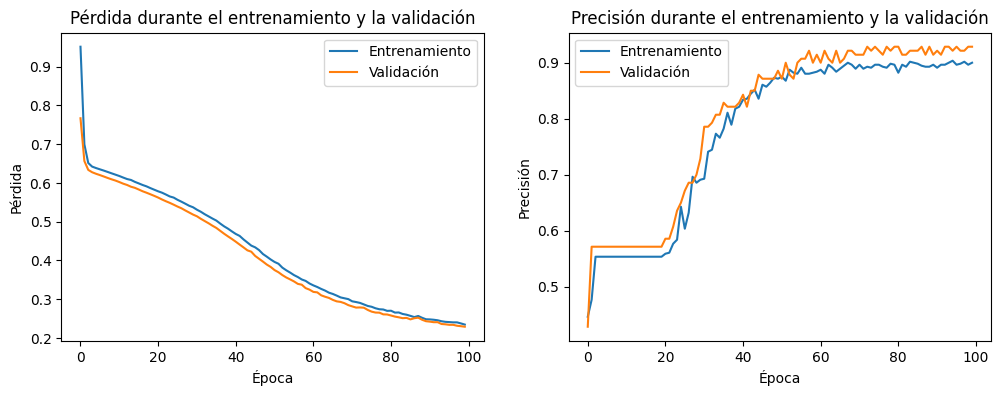

In [19]:
# ---------------ENTRENAMIENTO---------------
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10) # Entrenar el modelo con los datos de entrenamiento y validación durante 100 épocas, con un batch size de 10

plt.figure(figsize=(12, 4)) # Visualizar la evolución del entrenamiento

plt.subplot(1, 2, 1) # Graficar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Entrenamiento') # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'], label='Validación') # Pérdida en el conjunto de validación
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='Validación')  # Precisión en el conjunto de validación
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()
plt.show()

In [20]:
# ---------------EVALUACIÓN---------------
test_loss, test_accuracy = model.evaluate(X_test, y_test) # Evaluar la pérdida y la precisión en el conjunto de prueba

# ---------------PREDICCIÓN---------------
test_predictions = (model.predict(X_test) > 0.5).astype(int) # Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias (1 o 0)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8794 - loss: 0.2765  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


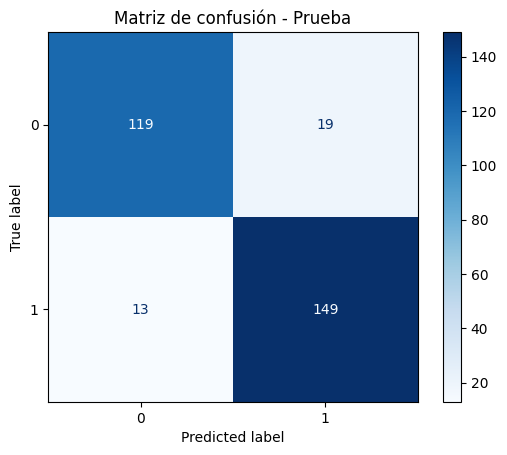


Métricas de prueba:
Accuracy: 0.8933333333333333
Recall: 0.9197530864197531
F1 Score: 0.9030303030303028



In [21]:
# ---------------MATRIZ DE CONFUSIÓN---------------
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred) # Calcular la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)  # Graficar la matriz con un mapa de colores
    plt.title(title)
    plt.show()

plot_confusion(y_test, test_predictions, "Matriz de confusión - Prueba")  # Mostrar la matriz de confusión para el conjunto de prueba

# ---------------EVALUACIÓN DE PRUEBA---------------
print("\nMétricas de prueba:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions)}") # Calcular y mostrar la precisión
print(f"Recall: {recall_score(y_test, test_predictions)}") # Calcular y mostrar el recall (sensibilidad)
print(f"F1 Score: {f1_score(y_test, test_predictions)}\n") # Calcular y mostrar el F1 Score

**Regularización con Dropout**

In [22]:
# ---------------CONSTRUCCIÓN DE LA RED NEURONAL--------------

from tensorflow.keras.layers import Dropout

model_dropout = Sequential() # Crear un modelo secuencial con Dropout

model_dropout.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],))) # Añadir una capa oculta con 4 neuronas y activación 'relu'
model_dropout.add(Dropout(rate=0.5))  # Dropout con el 50% de las neuronas desconectadas aleatoriamente durante el entrenamiento
model_dropout.add(Dense(units=1, activation='sigmoid')) # Añadir la capa de salida con 1 neurona y función de activación 'sigmoid' para la clasificación binaria
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compilar el modelo usando el optimizador 'adam', la función de pérdida 'binary_crossentropy', y medir "accuracy"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4814 - loss: 12.7842 - val_accuracy: 0.5714 - val_loss: 9.6718
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5270 - loss: 9.9815 - val_accuracy: 0.5714 - val_loss: 6.4268
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5378 - loss: 4.9748 - val_accuracy: 0.5714 - val_loss: 3.7708
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5361 - loss: 3.3424 - val_accuracy: 0.5714 - val_loss: 1.4317
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 1.5335 - val_accuracy: 0.7643 - val_loss: 0.4551
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7486 - loss: 0.5264 - val_accuracy: 0.8357 - val_loss: 0.4515
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - loss: 0.5050 - val_accuracy: 0.8714 - val_loss: 0.4500
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7157 - loss: 0.5153 - val_accuracy: 0.8714 - 

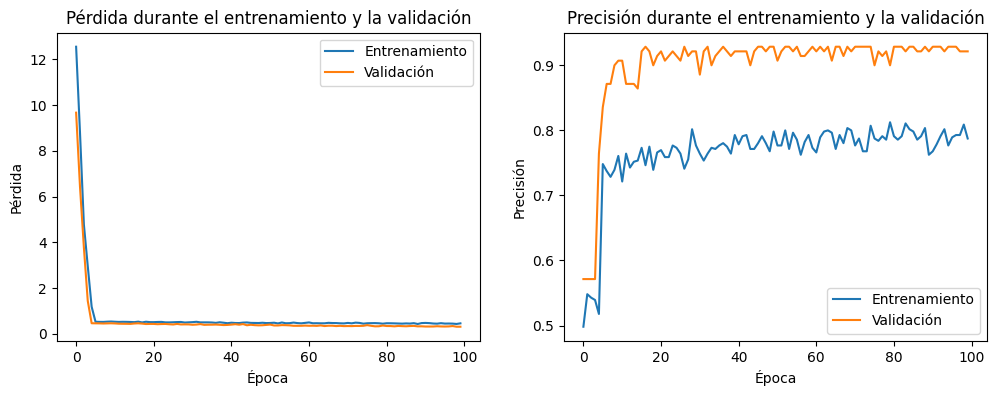

In [23]:
# ---------------ENTRENAMIENTO---------------
history = model_dropout.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10) # Entrenar el modelo con los datos de entrenamiento y validación durante 100 épocas, con un batch size de 10

plt.figure(figsize=(12, 4)) # Visualizar la evolución del entrenamiento

plt.subplot(1, 2, 1) # Graficar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Entrenamiento') # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'], label='Validación') # Pérdida en el conjunto de validación
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='Validación')  # Precisión en el conjunto de validación
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()
plt.show()

In [24]:
# ---------------EVALUACIÓN---------------
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test) # Evaluar la pérdida y la precisión en el conjunto de prueba

# ---------------PREDICCIÓN---------------
test_predictions1 = (model_dropout.predict(X_test) > 0.5).astype(int) # Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias (1 o 0)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8940 - loss: 0.3465  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


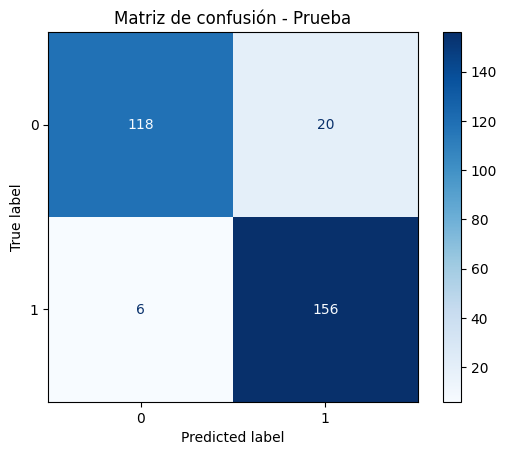


Métricas de prueba:
Accuracy: 0.9133333333333333
Recall: 0.9629629629629629
F1 Score: 0.923076923076923



In [25]:
# ---------------MATRIZ DE CONFUSIÓN---------------
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred) # Calcular la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)  # Graficar la matriz con un mapa de colores
    plt.title(title)
    plt.show()

plot_confusion(y_test, test_predictions1, "Matriz de confusión - Prueba")  # Mostrar la matriz de confusión para el conjunto de prueba

# ---------------EVALUACIÓN DE PRUEBA---------------
print("\nMétricas de prueba:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions1)}") # Calcular y mostrar la precisión
print(f"Recall: {recall_score(y_test, test_predictions1)}") # Calcular y mostrar el recall (sensibilidad)
print(f"F1 Score: {f1_score(y_test, test_predictions1)}\n") # Calcular y mostrar el F1 Score

**Regularización con L2 (Ridge)***

In [26]:
# ---------------CONSTRUCCIÓN DE LA RED NEURONAL--------------

from tensorflow.keras.regularizers import l2

model_l2 = Sequential() # Crear un modelo secuencial con regularización L2

# Añadir una capa oculta con 4 neuronas, activación 'relu' y regularización L2
model_l2.add(Dense(units=4, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],))) # L2 aplica un castigo a los pesos grandes, incentivando al modelo a mantener pesos más pequeños para evitar sobreajuste
model_l2.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01))) # Añadir la capa de salida con 1 neurona y activación 'sigmoid' para clasificación binaria
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compilar el modelo usando el optimizador 'adam', la función de pérdida 'binary_crossentropy', y medir "accuracy"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5763 - loss: 28.6104 - val_accuracy: 0.5714 - val_loss: 25.3778
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5137 - loss: 28.2196 - val_accuracy: 0.5714 - val_loss: 21.2028
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 21.7772 - val_accuracy: 0.5714 - val_loss: 17.5484
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 17.9758 - val_accuracy: 0.5714 - val_loss: 14.2639
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 13.4437 - val_accuracy: 0.5714 - val_loss: 11.4837
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5535 - loss: 11.2612 - val_accuracy: 0.5714 - val_loss: 8.9473
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5657 - loss: 8.6760 - val_accuracy: 0.5714 - val_loss: 6.7183
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5510 - loss: 6.6696 - val_accuracy:

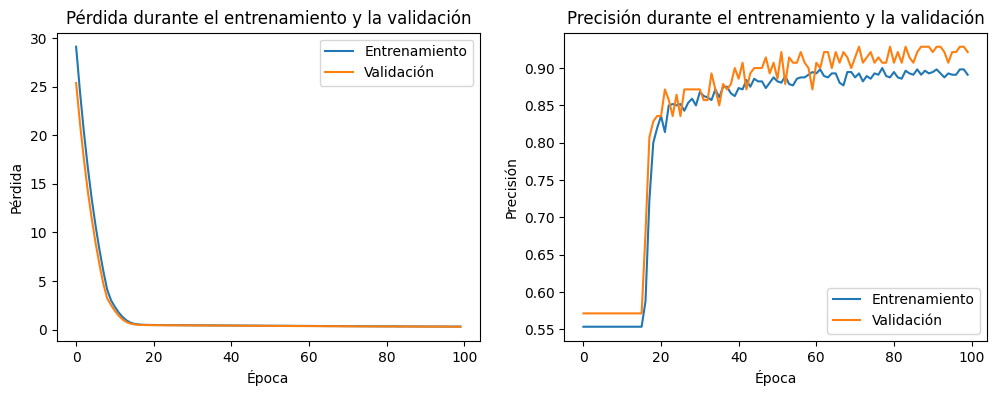

In [27]:
# ---------------ENTRENAMIENTO---------------
history = model_l2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10) # Entrenar el modelo con los datos de entrenamiento y validación durante 100 épocas, con un batch size de 10

plt.figure(figsize=(12, 4)) # Visualizar la evolución del entrenamiento

plt.subplot(1, 2, 1) # Graficar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Entrenamiento') # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'], label='Validación') # Pérdida en el conjunto de validación
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='Validación')  # Precisión en el conjunto de validación
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()
plt.show()

In [28]:
# ---------------EVALUACIÓN---------------
test_loss, test_accuracy = model_l2.evaluate(X_test, y_test) # Evaluar la pérdida y la precisión en el conjunto de prueba

# ---------------PREDICCIÓN---------------
test_predictions2 = (model_l2.predict(X_test) > 0.5).astype(int) # Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias (1 o 0)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.3376  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


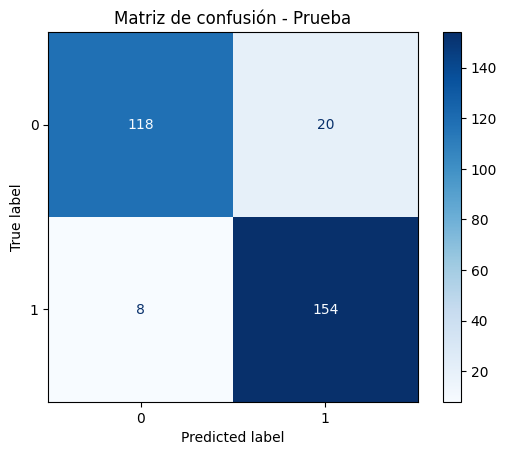


Métricas de prueba:
Accuracy: 0.9066666666666666
Recall: 0.9506172839506173
F1 Score: 0.9166666666666666



In [29]:
# ---------------MATRIZ DE CONFUSIÓN---------------
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred) # Calcular la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)  # Graficar la matriz con un mapa de colores
    plt.title(title)
    plt.show()

plot_confusion(y_test, test_predictions2, "Matriz de confusión - Prueba")  # Mostrar la matriz de confusión para el conjunto de prueba

# ---------------EVALUACIÓN DE PRUEBA---------------
print("\nMétricas de prueba:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions2)}") # Calcular y mostrar la precisión
print(f"Recall: {recall_score(y_test, test_predictions2)}") # Calcular y mostrar el recall (sensibilidad)
print(f"F1 Score: {f1_score(y_test, test_predictions2)}\n") # Calcular y mostrar el F1 Score

**Regularización con Batch Normalization**

In [30]:
# ---------------CONSTRUCCIÓN DE LA RED NEURONAL--------------

from tensorflow.keras.layers import BatchNormalization

model_batchnorm = Sequential() # Crear un modelo secuencial con Batch Normalization

# Añadir una capa oculta con 4 neuronas y Batch Normalization
model_batchnorm.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],)))
model_batchnorm.add(BatchNormalization())  # Normaliza las activaciones en cada batch para estabilizar el entrenamiento
model_batchnorm.add(Dense(units=1, activation='sigmoid')) # Añadir la capa de salida con 1 neurona y activación 'sigmoid' para clasificación binaria
model_batchnorm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compilar el modelo usando el optimizador 'adam', la función de pérdida 'binary_crossentropy', y medir "accuracy"

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1456 - loss: 0.8903 - val_accuracy: 0.4286 - val_loss: 1.0801
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1655 - loss: 0.7989 - val_accuracy: 0.1714 - val_loss: 0.7769
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4231 - loss: 0.7212 - val_accuracy: 0.4286 - val_loss: 0.6935
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 0.6557 - val_accuracy: 0.4286 - val_loss: 0.6765
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8281 - loss: 0.5960 - val_accuracy: 0.4286 - val_loss: 0.7683
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8679 - loss: 0.5479 - val_accuracy: 0.4286 - val_loss: 1.2482
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9093 - loss: 0.4939 - val_accuracy: 0.4286 - val_loss: 1.2026
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9264 - loss: 0.4611 - val_accuracy: 0.4286 - v

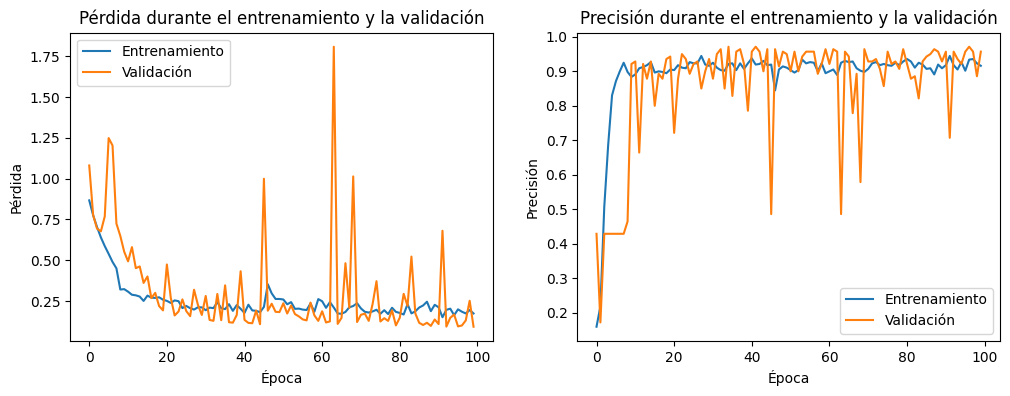

In [31]:
# ---------------ENTRENAMIENTO---------------
history = model_batchnorm.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=10) # Entrenar el modelo con los datos de entrenamiento y validación durante 100 épocas, con un batch size de 10

plt.figure(figsize=(12, 4)) # Visualizar la evolución del entrenamiento

plt.subplot(1, 2, 1) # Graficar la pérdida a lo largo de las épocas
plt.plot(history.history['loss'], label='Entrenamiento') # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'], label='Validación') # Pérdida en el conjunto de validación
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'], label='Validación')  # Precisión en el conjunto de validación
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')  # Etiqueta del eje X
plt.ylabel('Precisión')  # Etiqueta del eje Y
plt.legend()
plt.show()

In [32]:
# ---------------EVALUACIÓN---------------
test_loss, test_accuracy = model_batchnorm.evaluate(X_test, y_test) # Evaluar la pérdida y la precisión en el conjunto de prueba

# ---------------PREDICCIÓN---------------
test_predictions3 = (model_batchnorm.predict(X_test) > 0.5).astype(int) # Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias (1 o 0)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.1209  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


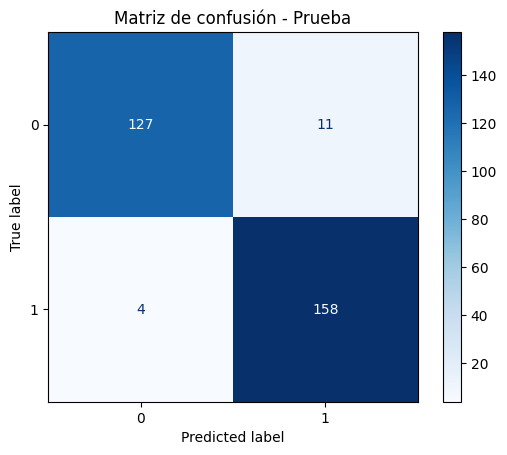


Métricas de prueba:
Accuracy: 0.95
Recall: 0.9753086419753086
F1 Score: 0.9546827794561933



In [33]:
# ---------------MATRIZ DE CONFUSIÓN---------------
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred) # Calcular la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)  # Graficar la matriz con un mapa de colores
    plt.title(title)
    plt.show()

plot_confusion(y_test, test_predictions3, "Matriz de confusión - Prueba")  # Mostrar la matriz de confusión para el conjunto de prueba

# ---------------EVALUACIÓN DE PRUEBA---------------
print("\nMétricas de prueba:")
print(f"Accuracy: {accuracy_score(y_test, test_predictions3)}") # Calcular y mostrar la precisión
print(f"Recall: {recall_score(y_test, test_predictions3)}") # Calcular y mostrar el recall (sensibilidad)
print(f"F1 Score: {f1_score(y_test, test_predictions3)}\n") # Calcular y mostrar el F1 Score